# Reply on the feedback of Lab 3

Again, thanks for your feedback on last assignment. Here's my response: 

## On 4.4 Q3: Function for calculating the CI

Absolutely! The awesome `scipy` library does so much more than a TI-84. The `scipy.stats.t` module covers all aspects of the $t$-test workflow, and the `interval` method provides the confidence interval in no time: 

```python
stats.t.interval(confidence=0.95, 
                 df=119, 
                 loc=injury_mean, 
                 scale=injury_sem)
```

Which outputs: 
```
(2.53106725077079, 3.252266082562543)
```

Humans make mistakes sometimes, so calling the function not only saves time but also helps avoid the chance of errors. As you explained the equations in the lecture and demonstrated the calculations, I think it’s best to follow your approach for the math as well.

I do this only when I'm doing assignments and just for fun. (In most cases) I never trust myself and my knowledge so I never do these dangerous thing to the real world data.  :P 

## On 4.5 Q4: $p$-value in my report

Got it! This part was refined and updated on the [web doc](https://shen.riko.work/educ8009/session05-06/assignment.html#q4-summarizing-the-findings). 

## On 4.2.2 Q1b: Trap in the future 

```latex
{\huge NOOOOOOOOOOOO!}
```

I believe my fellow classmates and I suffered enough from the traps in the quizzes.

## While I was writing this part

My lord jumped on my desk for a warm greeting: 

![The Lord](./the-prince-2.jpg)


# Context

```
 _._     _,-'""`-._
(,-.`._,'(       |\`-/|
    `-.-' \ )-`( , o o)
          `-    \`_`"'-
```

Open the data in the file catterplot.sav. These data measure two variables: 

- `dinner_time`: the time since last feeding a cat.
- `meow`: how loud their purr is.


# Objectives

1. Describe the distribution of `dinner_time`.
2. Draw a scatterplot of `meow` against `dinner_time` with the LOESS curve. Do you think the two variables are linearly related?
3. Compute the correlation coefficient of `dinner_time` and `meow`. Does the correlation coefficient suggest a strong linear relationship?
4. Test the null hypothesis that the two variables are not linearly related at the 5% level.
5. (Extra credit) Obtain a 95% confidence interval for the population correlation coefficient of the two variables. 

# Solutions

## A quick dataset check-up

In [27]:
import pandas as pd
catterplot_df = pd.read_spss('./datasets/catterplot.sav')

print(f'Description on the dataset: \n',catterplot_df.describe())

Description on the dataset: 
        dinner_time       meow
count    78.000000  78.000000
mean      9.865385   8.217949
std       6.068159   3.747371
min       1.000000   2.000000
25%       5.000000   5.000000
50%       9.000000   8.000000
75%      14.000000  12.000000
max      24.000000  15.000000


## Q1: Data distribution

**Answer**

| Measurement| Value|
|------------|------|
| Mean       | 9.87 |
| Median     | 9.00 |
| Mode       | 5.00 |

: Mean, mode and median {#tbl-centrality}

@tbl-centrality lists measurements on the central tendency of this data, the mean (9.87) is slightly higher than the median (9.00) but much higher than the mode (5.00). The distribution is right-skewed as shown by @fig-dinner-time-hist, and a longer tail is found on the right side. There is a clear peak around 5, which indicates most cats in this sample were fed with in 5 hours. 

**Solution**

To describe the distribution of the dataset, I will again use the mean, median, and mode to assess central tendency, along with a histogram to visualize the distribution.

In [28]:
def centrality(df): 
    mean = df.mean()
    median = df.median()
    mode = df.mode()[0]
    return mean, median, mode

cats_mean, cats_median, cats_mode = centrality(catterplot_df['dinner_time'])
print(f'Central Tendency: \n'
      f'Mean: {cats_mean}, \n'
      f'Median: {cats_median} \n' 
      f'Mode: {cats_mode}')

Central Tendency: 
Mean: 9.865384615384615, 
Median: 9.0 
Mode: 5.0


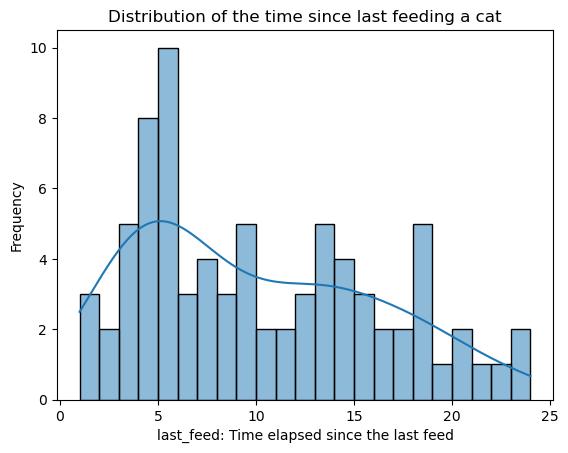

In [29]:
#| label: fig-dinner-time-hist
#| fig-cap: Distribution of Dinner Time

import matplotlib.pyplot as plt
import seaborn as sns

# Create a histogram to reveal the distribution. 
dinner_time_hist = sns.histplot(catterplot_df, x='dinner_time', kde=True, bins=23)
# Set titles and labels for x- and y- axis
dinner_time_hist.set_title('Distribution of the time since last feeding a cat')
dinner_time_hist.set_xlabel('last_feed: Time elapsed since the last feed')
dinner_time_hist.set_ylabel('Frequency')
# Display the plot
plt.show()

## Q2: The (s)catterplot

**Answer**

The scatter plot in @fig-catterplot shows that the data, at least, forms a perfect shape of a cat! However, the scattered points and the gentle slope of the LOESS curve suggest that there is not a strong linear relationship between the time since the last feeding (`dinner_time`) and the loudness of purring (`meow`). The scatter plot also indicates a weak correlation between these two variables.


**Solution**


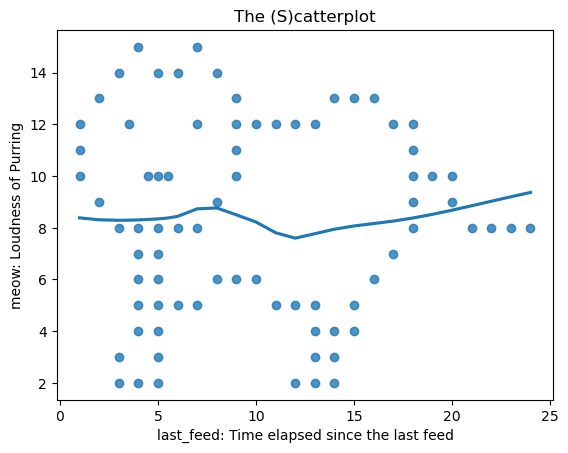

In [30]:
#| label: fig-catterplot
#| fig-cap: The (s)catterplot on meow againt dinnertime. 

import matplotlib.pyplot as plt
import seaborn as sns

catterplot = sns.regplot(catterplot_df, x='dinner_time', y='meow', fit_reg=True, lowess=True)
catterplot.set_title('The (S)catterplot')
catterplot.set_xlabel('last_feed: Time elapsed since the last feed')
catterplot.set_ylabel('meow: Loudness of Purring')
plt.show()

## Q3: The Pearson's $r$ of `dinner_time` v. `meow`

**Answer**

$r \approx -6.12 \times 10^{-3}$

The pearson's correlation coefficient $r \approx -6.12 \times 10^{-3}$ is very close to zero, suggesting there may be no linear relationship between `dinner_time` and `meow` in this dataset. However, it's important to note that the data lacks further details, particularly regarding the sampling procedure. Specifically, we don’t know if the data represents multiple observations of a single cat (in which case it would be a single case) or if it was collected from several different cats (in which case the sample size and whether the sample is similar to population of interest needs to be justified). Although the correlation is statistically weak, we cannot definitively conclude that there is no relationship between the given variables.[^1]

In conclusion, the pearson's $r$ suggests there is no strong linear relationship between the time since last feed and the volume of cats' purring. That's all I can say. 

**Solution**

To calculate the pearson's $r$, I use the formula[^2]: 

$$r = \frac{\sum_{Z_XZ_Y}}{N-1}$$

[^1]: As a devoted servant to cat, I must say that, in my experience, our cat never purrs after a meal. So, there’s definitely no relationship between those variables in my case. Staying silent seems to be his strategy for navigating this wild and dangerous world. 
[^2]: I just put the formula here for ... nothing? I didn't actually calculated on hand this time. :P

In [31]:
import scipy.stats as stats

pearson_r_results_cats = stats.pearsonr(catterplot_df.meow, catterplot_df.dinner_time)

pearson_r_cats = pearson_r_results_cats[0]
p_cats = pearson_r_results_cats[1]

print(f'Correlation Coefficient\n'
      f'Pearson-r: {pearson_r_cats}\n'
      f'p-value: {pearson_r_results_cats[1]}')

Correlation Coefficient
Pearson-r: -0.006117549224989473
p-value: 0.9576068830096687


## Q4: Test $H_0$ at the 5% sig-level

**Answer**

$p \approx 0.9576$

The $p$-value is much greater than the significance level $\alpha = 0.05$, therefore, we fail to reject the null hypothesis ($H_0$) that `dinner_time` and `meow` are not linearly related. This means that there is insufficient evidence to suggest a linear relationship between `dinner_time` and `meow` at the 5% significance level, the sample does not indicate a significant linear correlation between the two variables.

**Solution**

The null hypothesis ($H_0$) and the alternative hypothesis ($H_1$) are formulated as follows:

 - $H_0:\rho = 0$: no linear relationship.
 - $H_1:\rho \neq 0$: linear relationship exists. 

Given $r \approx -0.0061$, $p \approx 0.9576$ and $\alpha = 0.05$: 

In [32]:
def test_hypothesis(p_value, alpha=0.05): 
    print(f'Given the p-value={p_value} and alpha={alpha}:')
    if p_value < alpha:
        print("Reject the null hypothesis: \nThere is evidence of a linear relationship.")
    else:
        print("Fail to reject the null hypothesis: \nNo significant linear relationship.")

test_hypothesis(p_cats, alpha=0.05)

Given the p-value=0.9576068830096687 and alpha=0.05:
Fail to reject the null hypothesis: 
No significant linear relationship.


## Q5: 95% CI of $\rho$

**Answer**

The 95% confidence interval for the population correlation coefficient $\rho$ is approximately:
$$[-0.2283, 0.2167]$$

**Solution**

Given $N = 78$, $r = -6.12 \times 10^{-3}$, the 95% confidence interval for the population correlation coefficient $\rho$ is then calculated based on the Fisher $z$-transformation, steps of calculation is listed below and I wrapped the calculation procedure in a single function: 

$z$-transformation

$$
z = \frac{1}{2}ln(\frac{1+r}{1-r}) = artanh(r)
$$

Standard error of $z$

$$
SE_z = \frac{1}{\sqrt{N-3}}
$$

CI in the $z$-scale

$$
z_{lower} = z - c \times SE_z
$$

$$
z_{upper} = z - c \times SE_z
$$

Inverse Fisher transformation

$$
r = \frac{exp(2z)-1}{exp(2z)+1} = tanh(z)
$$

Finally we get

$$
r_{lower} = tanh(z_{lower})
$$
$$
r_{upper} = tanh(z_{upper})
$$

In [33]:
from math import sqrt, tanh, atanh

n_cats = len(catterplot_df)

def ci_rho(n, pearson_r, alpha=0.05):
    # z-transformation
    z = atanh(pearson_r)
    # SEM of z
    se_z = 1 / sqrt(n - 3)
    # CI in the z score in the 95% level.  
    c = stats.norm.ppf(1 - alpha / 2)
    z_lower = z - c * se_z
    z_upper = z + c * se_z
    # Inverse Fisher transformation
    r_lower = tanh(z_lower)
    r_upper = tanh(z_upper)
    return r_lower, r_upper

r_lower_cats, r_upper_cats = ci_rho(n_cats, pearson_r_cats)

print(f'0.95 Confidence Intervals of rho: \n'
      f'Lower Limit: {r_lower_cats} \n'
      f'Upper Limit: {r_upper_cats}')

0.95 Confidence Intervals of rho: 
Lower Limit: -0.22833745967041358 
Upper Limit: 0.21670822097748485


In [34]:
# Or just call the function: 

# Ths pearson-r results was calculated in Q3, and stored in pearson_r_results_cats
# Just apply the confidence_interval method on the pearson_r_results_cats, and bingo! 

ci_rho_cats = pearson_r_results_cats.confidence_interval(confidence_level=0.95) # It does the Fisher transformation by default

print(f'0.95 Confidence Intervals of rho: \n'
      f'Lower Limit: {ci_rho_cats[0]} \n'
      f'Upper Limit: {ci_rho_cats[1]}')

0.95 Confidence Intervals of rho: 
Lower Limit: -0.22833745967041358 
Upper Limit: 0.21670822097748485


\pagebreak

# Final thoughts: Cats good, humans bad. 

![The Prince](./the-prince.jpg){#fig-the-prince}

In Chinese social media, there's a meme called "Cats good, humans bad" (貓好人壞), which humorously suggests that cats are always right and any misbehavior is blamed on humans. My partner and I keep an American Shorthair (see @fig-the-prince) in our rented place, and we call him *the Prince*, not because of his noble lineage, but due to his annoying behaviors that sometimes drive us crazy. For instance, when he desires food, he jumps on our bed and meows loudly, trying to wake us up in the early morning! 

I think if I plot the `loudness` of our Prince's meowing, the peak would definitely appear BEFORE `mealtime`, as he meows to summon his servant.

And he eats better than we do! According to my partner, she steams duck breasts for our cat at low temperature to keep the meat juicy, a process that takes hours to prepare. Meanwhile, his two poor owners often resort to instant food from the supermarket or just grab a meal from the nearby Saizeriya. (Yes, there's a Saizeriya close to our block!)

Yet, we always remind ourselves that we are not serving the Prince to the best of our abilities. 

貓好人壞. The kitty is always innocent!

Alright, it’s good to be a cat like the Prince, who keeps meowing at the door, knowing that at the start and the end of the day, a two-legged monster will appear to feed him, regardless of how stressful and dangerous those poor monsters in the world outside might encounter.

We all love him, without any doubt!

\newpage

```plain
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⢀⣀⣀⣀⣀⣀⣤⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⣀⡠⠤⠤⠤⠒⠒⠈⠉⠙⠒⠲⣌⠉⢀⣀⢼⠷⠃⠈⢹⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⢶⠲⣿⠋⠉⠉⠽⠛⣹⡟⠁⠀⠀⠀⠀⠀⠀⠀⠀⠤⣀⠀⠑⠞⠒⠒⠒⠀⠀⣼⣦⣀⢴⡆⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠈⢆⠀⠀⠀⠀⠀⢸⠏⠀⠀⠀⠀⠄⠀⠀⠁⠀⢠⠀⠈⠑⢄⠀⡀⢄⡄⠀⢠⣿⣿⡧⢸⠁⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠈⣆⠀⠀⠀⢀⠃⠀⠀⠀⠀⢠⠃⠀⠀⠀⠀⠀⢇⠀⠀⠀⢀⡘⡄⠁⢀⠟⠉⠁⠀⡞⠀⠀⠀⠀⠀⠀⠀⠀⠀
⡖⠢⢤⣏⢆⠀⠀⡆⢀⡆⢀⠀⠀⢸⠀⠀⠀⠀⠀⡀⠸⡀⠀⠀⠀⠓⠸⡀⠘⣆⡀⠀⢰⡇⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠹⡄⠀⠈⠝⢷⣼⡇⢸⠁⠀⠀⠀⡘⣾⠀⠀⠀⠀⠗⠦⠤⠤⡤⠂⠀⠀⡇⠀⣿⣄⠀⠘⣇⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⢹⡤⠆⢀⡴⢿⡇⢸⠀⢸⡴⠊⠉⠙⠣⣀⠀⡀⠀⠀⣨⣿⣿⡶⣤⡆⢳⡀⣿⠀⠉⠒⠛⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠘⡇⠀⡠⢲⠃⢃⠈⣦⣘⡷⢶⣶⣦⣄⠈⠁⠀⠀⣾⣏⢽⣿⣧⣟⡇⠀⡿⢻⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠇⠈⣰⠋⢳⠘⣤⢼⡈⣇⢿⡾⡟⡿⠃⠀⣀⡀⠀⠙⠓⠛⠋⣸⣵⠄⢸⣰⠃⠀⠀⠀⠀⢀⡠⠤⠤⢄⠀⠀⠀
⠀⠀⠘⡤⠃⠀⢸⣿⠻⡀⢣⡈⠀⠉⠉⠁⠀⠀⠀⠀⠀⠀⠀⠠⠾⢏⡿⠀⢸⢿⠀⠀⢠⣤⡔⠁⣀⢄⡀⠀⠙⡄⠀
⠀⠀⠀⠀⠀⢠⣿⢿⡄⠀⢲⣯⡟⠁⠀⠀⠀⠒⠊⠉⠀⠀⠀⣀⣴⠾⣤⣴⢃⣼⠀⠀⠀⣽⠁⠀⢠⡜⠁⠀⠀⢰⠀
⠀⠀⠀⠀⠀⠠⢷⡆⢱⣀⠈⢻⣏⣑⣶⠤⠤⣤⠤⠤⠤⠶⣏⠉⠀⢀⠿⣇⣴⠃⠀⠀⠀⠘⡄⠀⠀⠡⠄⠀⠀⡜⠀
⠀⠀⠀⣷⡀⢰⠋⢻⢸⠈⠉⠉⠁⠀⠀⠀⣾⡿⠒⠤⢄⣰⡟⣷⣀⢸⣠⠏⢹⠀⣀⣠⠀⠀⠈⠢⠤⠤⠤⠤⠊⠀⠀
⠀⠀⠀⡟⢳⣿⠀⠌⣸⠁⣀⣀⣀⣠⠴⠊⠉⢑⣒⠤⣤⣤⣶⣿⠾⣯⠉⠓⠻⣏⢁⠞⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠐⣷⠀⣿⣧⣾⡟⠋⡜⠉⠁⠀⠀⠸⣍⠉⢉⠉⣿⣿⣅⠀⢠⠃⠀⢸⡀⠈⢿⣄⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠘⡾⠁⠈⡟⠁⡜⠀⠀⢀⡀⠀⠀⠘⡆⠁⡰⠋⢣⢹⠳⣮⠀⠀⠈⣷⠀⠀⠀⠙⣦⡀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⢠⠁⡀⣀⡿⠞⠀⠀⠀⠈⡇⠀⠀⠀⠳⠞⠀⠀⠈⠻⠖⠁⠀⠀⠀⠈⢷⡄⠀⠀⠈⢳⡄⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠘⠻⢻⣿⠀⠀⠀⠀⠀⢰⡧⣀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠙⢧⡀⢀⣿⣇⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⣿⣿⠀⠠⡀⠀⠀⡞⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⢻⣿⠗⠙⠳⣄⠀⠀⠀⠀⠀
⠀⠀⠀⢀⡞⠉⠉⠑⢄⡈⠻⢤⡇⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠈⡇⠀⠀⠀⠈⠳⣄⠀⠀⠀
⠀⠀⢀⣾⠀⠀⠀⠀⠀⠈⠒⣼⡄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⣴⠃⠀⠀⠀⠀⠀⠈⠏⠒⠤
⢀⡴⠋⠀⠀⠀⠀⠀⠀⠀⡰⠛⢿⡆⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⣠⣾⠛⠦⣄⡀⠀⠀⠀⠀⠀⠀⠀
```
[^3]

[^3]: An easter egg here, something can't be compiled by {\LaTeX}. 